In [7]:
# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [129]:
shape_predictor= "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor)

In [235]:
image_files= glob.glob("images/*.png", )

In [317]:
def calc_landmarks_from_file(image_file,draw=True):
    #read the points file
    points_file= image_file.replace("png", "pts")
    points=np.genfromtxt(points_file,skip_header=3, skip_footer=1, delimiter=' ')
    bbox= np.max(points,axis=0)- np.min(points,axis=0)

    # read the image
    ori_image = cv2.imread(image_file)
    # resize the image to a width of 500    
    image = imutils.resize(ori_image, width=500)
    scale_factor=ori_image.shape[1]/500

    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # detect all faces in the grayscale image
    rects = detector(gray, 1)
    if len(rects) ==0: # i.e. if no candidates were found
        NaN=float("nan")
        return NaN,(NaN,NaN), ori_image.shape,scale_factor,len(rects)
    # loop over the face detections
    print (f"# BBs: {len(rects)}")
    best_normed_err=10
    
    for (i, rect) in enumerate(rects):
        
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
        if False:
            (x, y, w, h) = face_utils.rect_to_bb(rect)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # show the face number
            cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

            # loop over the (x, y)-coordinates for the facial landmarks
            # and draw them on the image
            for (x, y) in shape:
                cv2.circle(image, (x, y), 1, (0, 0, 255), -1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.show()
        shape= shape *scale_factor
        error = (shape- points)/bbox
        normed_err = np.sqrt(np.mean(np.linalg.norm(error, axis=1)**2))
        if normed_err <best_normed_err:
            best_normed_err = normed_err
            best_shape = shape

            
        
        
    if draw:
        for (x, y) in best_shape:
            cv2.circle(ori_image, (int(x),int(y)), int(2*scale_factor), (0, 0, 255), -1)
        for (x, y) in points:
            cv2.circle(ori_image, (int(x),int(y)), int(2*scale_factor), (0, 255, 0), -1)
        plt.imshow(cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB))
        plt.show()
    
    return best_normed_err,bbox, ori_image.shape,scale_factor, len(rects)




# BBs: 1


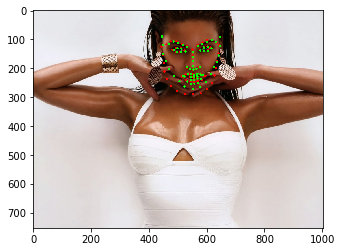

# BBs: 1


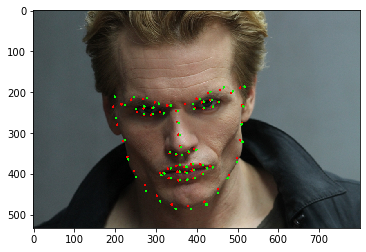

# BBs: 1


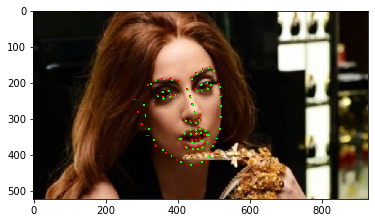

# BBs: 1


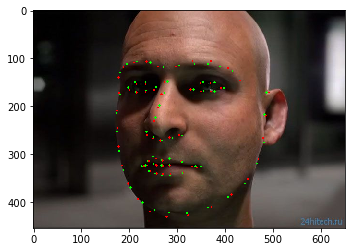

In [321]:
df=pd.DataFrame(columns= ['FileName','Height','Width','BBox_W','BBox_H','Scale','Detected Faces','Normed_Err'])
for image_file in image_files[:5]:
    normed_err, bbox, size,scale_factor,detected_faces = calc_landmarks_from_file(image_file, draw=True)
    res={}
    res['FileName']=image_file
    res['Height']=size[0]
    res['Width']=size[1]    
    res['BBox_W']=bbox[0]
    res['BBox_H']=bbox[1]
    res['Scale']=scale_factor    
    res['Detected Faces']=detected_faces
    res['Normed_Err']=normed_err
    
    
    df= df.append(res, ignore_index=True)

In [319]:
df.to_excel("baseline_test_results.xlsx")    
df

,FileName,Height,Width,BBox_W,BBox_H,Scale,Detected Faces,Normed_Err
0,images\indoor_001.png,753,1004,201.302,180.435,2.008,1,0.085716
1,images\indoor_002.png,533,800,318.827,299.723,1.600,1,0.026742
2,images\indoor_003.png,800,1200,NaN,NaN,2.400,0,NaN
3,images\indoor_004.png,523,930,215.869,267.394,1.860,1,0.039847
4,images\indoor_005.png,454,650,312.588,315.651,1.300,1,0.024085
...,...,...,...,...,...,...,...,...
295,images\indoor_296.png,720,1280,214.852,230.510,2.560,1,0.028196
296,images\indoor_297.png,504,800,140.377,141.501,1.600,1,0.027858
297,images\indoor_298.png,523,800,96.931,99.056,1.600,2,0.048232
298,images\indoor_299.png,728,1222,297.935,320.434,2.444,1,0.028276
